3. Image Classification python version:3.7 opencv version: 3.4.2

3.1 coding question

Training

1. Resize the training images to 128  128.

In [379]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

# iterator used to apply transformations
def iterator1(piclist,methodtoRun):
    for i in range(0,len(piclist)):
        piclist[i]=methodtoRun(piclist[i])
        
# iterator used to calculate parameters       
def iterator2(piclist,gradientslist,methodtoRun):
    for i in range(0,len(piclist)):
        gradientslist.append(methodtoRun(piclist[i]))
        
#function that convert img from BGR mode to GRAY mode 
def cvt2gray(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

#function that set img to size 128x128
def set128(img):
    img = cv2.resize(img,(128,128))
    return img

# load images from file
img1Train1=cv2.imread("ford_train1.jpeg")
img1Train2=cv2.imread("ford_train2.jpeg")
img1Train3=cv2.imread("ford_train3.jpeg")
img1Train4=cv2.imread("ford_train4.png")
img1Train5=cv2.imread("ford_train5.jpeg")

img2Train1=cv2.imread("volks_train1.png")
img2Train2=cv2.imread("volks_train2.jpeg")
img2Train3=cv2.imread("volks_train3.jpeg")
img2Train4=cv2.imread("volks_train4.jpeg")
img2Train5=cv2.imread("volks_train5.jpeg")

# create a list of pictures loaded
piclist=[img1Train1,img1Train2,img1Train3,img1Train4,img1Train5,
     img2Train1,img2Train2,img2Train3,img2Train4,img2Train5,]

# convert all of them into graymode and set size to 128x128
iterator1(piclist,cvt2gray)
iterator1(piclist,set128)

2.Compute HoG features

In [380]:
cell_size = (4, 4)  # h x w in pixels
block_size = (4, 4)  # h x w in cells
nbins = 8 # number of orientation bins
# list used to store gradients of piclist
gradientslist=[]

# function that used to compute hog
def computehog(pic):
    hog = cv2.HOGDescriptor(_winSize=(pic.shape[1] // cell_size[1] * cell_size[1],
                                      pic.shape[1] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)
    n_cells = (pic.shape[0] // cell_size[0], pic.shape[1] // cell_size[1])
# Compute HoG features
    hog_feats = hog.compute(pic).reshape(n_cells[1] - block_size[1] + 1,n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins).transpose((1, 0, 2, 3, 4))  # index blocks by rows first
# hog_feats now contains the gradient amplitudes for each direction,for each cell of its group for each group.
# Indexing is by rows then columns.
# computation for BlockNorm
    gradients = np.full((n_cells[0], n_cells[1], 8), 0, dtype=float)
    cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)
    for off_y in range(block_size[0]):
        for off_x in range(block_size[1]):
            gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
            cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

# Average gradients
    gradients /= cell_count
    return gradients
#compute hog for each pic in piclist and store them in gradientslist
iterator2(piclist,gradientslist,computehog)

3. Fit classifier

In [381]:
#set n_neighbors to3
neig=KNeighborsClassifier(n_neighbors=3)

# create labels
label=[1,1,1,1,1,-1,-1,-1,-1,-1]

# convert 4d list into 2d list
for i in range (0,len(gradientslist)):
    gradientslist[i] = gradientslist[i].reshape(gradientslist[i].shape[0]*gradientslist[i].shape[1]*gradientslist[i].shape[2])
    gradientslist[i] = gradientslist[i].transpose()
# train 
neig.fit(gradientslist,label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Testing

1.Resize test images to 128x128

In [382]:
# load images
img1Test1=cv2.imread("ford_test.jpeg")
img2Test1=cv2.imread("volks_test.jpeg")
# create list of test imgs
picTestList=[img1Test1,img2Test1]
# convert testimgs to gray mode and set size to 128x128
iterator1(picTestList,cvt2gray)
iterator1(picTestList,set128)

2.Compute hog features for test images

In [383]:
# list that will store hog for test images
gradientsTest=[]
# compute hog and store data into gradientsTest
iterator2(picTestList,gradientsTest,computehog)

3.Display features for both test images

img1HOG bin =  0


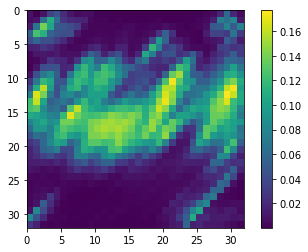

img1HOG bin =  1


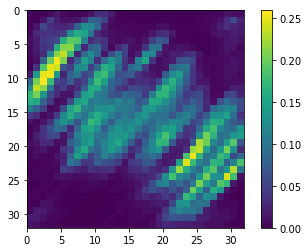

img1HOG bin =  2


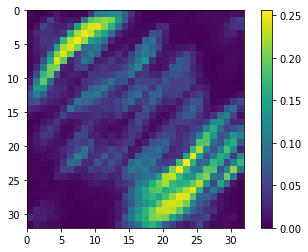

img1HOG bin =  3


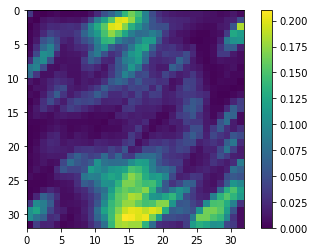

img1HOG bin =  4


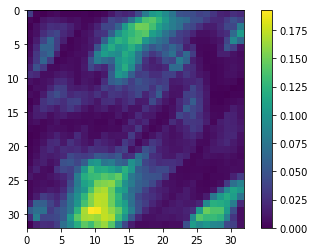

img1HOG bin =  5


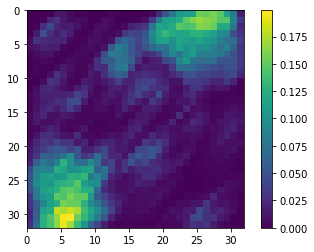

img1HOG bin =  6


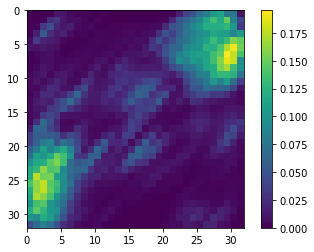

img1HOG bin =  7


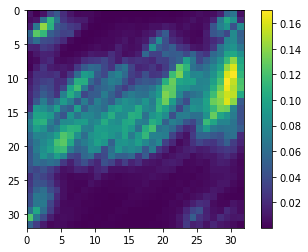

img2HOG bin =  0


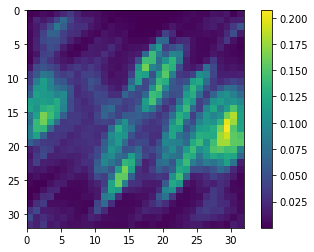

img2HOG bin =  1


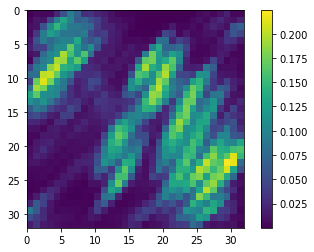

img2HOG bin =  2


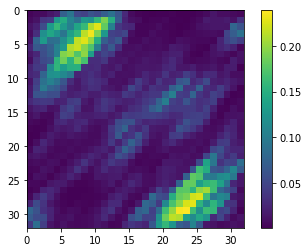

img2HOG bin =  3


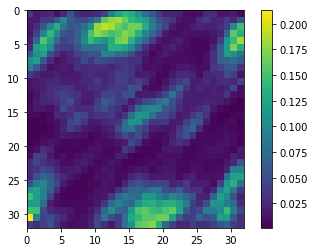

img2HOG bin =  4


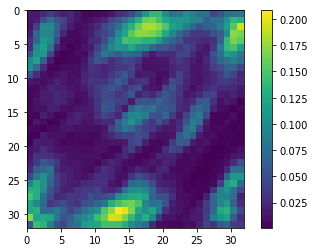

img2HOG bin =  5


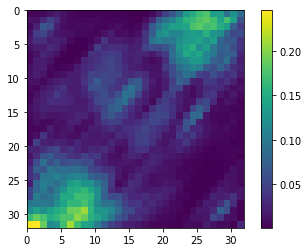

img2HOG bin =  6


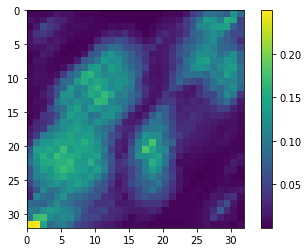

img2HOG bin =  7


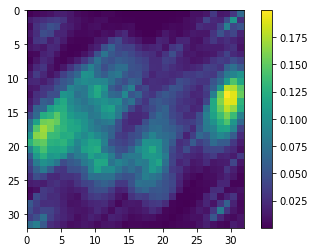

In [384]:
# print each bin of the test image
for i in range (0,8):
    bin = i  # angle is 360 / nbins * direction
    plt.pcolor(gradientsTest[0][:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    #plt.title("HOG bin ="), plt.xticks([]), plt.yticks([])
    print("img1HOG bin = ", bin)
    plt.colorbar()
    plt.show()
for i in range (0,8):
    bin = i  # angle is 360 / nbins * direction
    plt.pcolor(gradientsTest[1][:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    #plt.title("HOG bin ="), plt.xticks([]), plt.yticks([])
    print("img2HOG bin = ", bin)
    plt.colorbar()
    plt.show()

4.Classify test images using classifier

In [385]:
# convert 4d list into 2d
for i in range (0,len(gradientsTest)):
    gradientsTest[i] = gradientsTest[i].reshape(gradientsTest[i].shape[0]*gradientsTest[i].shape[1]*gradientsTest[i].shape[2])
    gradientsTest[i] = gradientsTest[i].transpose()
#predict based on the dataset trained above
neig.predict(gradientsTest)

array([ 1, -1])

3.2. Reasoning Questions:

1. Will HoG work if image of logos undergo random rotation? If yes, which property of HoG avails this feature? If not, discuss the sequence of computer vision technique(s) that can be used in order to regain uniform orientation of the logos.


Answers: 
    HoG is not rotation invariant feature. HoG is not just Histogram of Gradients, it is Histogram of Orientated Gradients, since it bins Gradients by their directions. For example, if we have a bin size of 45 degree, then we rotate the image by 45 degree, we will shift each Histogram value over one bin. In order to gain the uniform orientation of the logos, we might want to find a main orientation and rotate pictures manually. Then apply the bins. 

2. Consider that you are given a large dataset with three types of images: variable sized squares with either or both diagonals drawn (see Figure 3). How many and with directions of the gradient are sufficient in order to correctly classify the image into three catagories?

2 would be enough. The direction of the gradients should be the same with 2 diagonals 45°,135°,225°,315°. 